In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import cupy as cp
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import wave
from PIL import Image
import glob
import sys, os
import time
from subprocess import run, PIPE
import cv2
from IPython.display import Image, display
import pprint
from keras.preprocessing.image import load_img,img_to_array
import keras
from tqdm import tqdm
from keras.layers.core import Activation, Dense

Tensorflowの読み込み

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# モジュールたち
これはもう触らなくてよし

##CSV書き換え

In [ ]:
df = pd.read_csv('/content/UrbanSound8K.csv')
df

In [ ]:
slice_file_name_wav = df['slice_file_name']
slice_file_name_wav

In [ ]:
slice_file_name_png = []
for i in range(len(slice_file_name_wav)):
  name, ext = os.path.splitext(os.path.basename(slice_file_name_wav[i]))
  slice_file_name_png.append(name + '.png')

slice_file_name_png

In [ ]:
df.insert(1,'slice_file_name_png', slice_file_name_png)

In [ ]:
df

,slice_file_name,slice_file_name_png,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032-3-0-0.png,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263-2-0-117.png,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263-2-0-121.png,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263-2-0-126.png,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263-2-0-137.png,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812-1-2-0.png,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812-1-3-0.png,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812-1-4-0.png,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812-1-5-0.png,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv')
df

In [ ]:
dataset_dict = df.to_dict()
dataset_dict

In [ ]:
spectrogram_path = {}

In [ ]:
for i in range(len(df)):
  file_name = str(dataset_dict['slice_file_name_png'][i])
  fold_name = str(dataset_dict['fold'][i])

  path = '/content/spectrogram_resized/fold' + fold_name + '/' + file_name

  spectrogram_path[i] = path

In [ ]:
dataset_dict['spectrogram_path'] = spectrogram_path
dataset_dict

In [ ]:
df = pd.DataFrame(dataset_dict)
df

In [ ]:
df.to_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv', index=False)

## CNN練習(MNIST)
https://www.tensorflow.org/tutorials/images/cnn?hl=ja

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
train_images, test_images = train_images / 255.0, test_images / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
Total params: 5,888
Trainable params: 5,888
Non-trainabl

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(450, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          4640      
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 18s 3ms/step - loss: 0.1655 - accuracy: 0.9482
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0621 - accuracy: 0.9805
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0462 - accuracy: 0.9859
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0369 - accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0293 - accuracy: 0.9911


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9891
0.9890999794006348


## データセットを配列に格納する

作業用ディレクトリ作成

In [ ]:
my_process = run(
  ['cp', '-r', '/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/spectrogram_resized/', '/content/'], # コマンドはスペース区切りではなく、リストで渡す。
  shell=False,  # Default が False なので省略可能ですが念の為（False の方が安全）。
  stdout=PIPE, stderr=PIPE
)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv')
df

,slice_file_name,slice_file_name_png,fold,classID,class,spectrogram_path
0,100032-3-0-0.wav,100032-3-0-0.png,5,3,dog_bark,/content/spectrogram_resized/fold5/100032-3-0-...
1,100263-2-0-117.wav,100263-2-0-117.png,5,2,children_playing,/content/spectrogram_resized/fold5/100263-2-0-...
2,100263-2-0-121.wav,100263-2-0-121.png,5,2,children_playing,/content/spectrogram_resized/fold5/100263-2-0-...
3,100263-2-0-126.wav,100263-2-0-126.png,5,2,children_playing,/content/spectrogram_resized/fold5/100263-2-0-...
4,100263-2-0-137.wav,100263-2-0-137.png,5,2,children_playing,/content/spectrogram_resized/fold5/100263-2-0-...
...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812-1-2-0.png,7,1,car_horn,/content/spectrogram_resized/fold7/99812-1-2-0...
8728,99812-1-3-0.wav,99812-1-3-0.png,7,1,car_horn,/content/spectrogram_resized/fold7/99812-1-3-0...
8729,99812-1-4-0.wav,99812-1-4-0.png,7,1,car_horn,/content/spectrogram_resized/fold7/99812-1-4-0...
8730,99812-1-5-0.wav,99812-1-5-0.png,7,1,car_horn,/content/spectrogram_resized/fold7/99812-1-5-0...


In [ ]:
df_shaffle = df.sample(frac=1, ignore_index=True)
df_shaffle

\#ndarrayに画像を格納(4次元配列、(8732,100,100,3))

In [ ]:
img_path_list = df_shaffle['spectrogram_path']
spectrogram_data_list = []
img_size = (100,100)

for img in img_path_list:
    temp_img = load_img(img,grayscale=False,target_size=(img_size))
    temp_img_array = img_to_array(temp_img) /255
    spectrogram_data_list.append(temp_img_array)

spectrogram_data_list = np.array(spectrogram_data_list)
print(f'dataset shape: {spectrogram_data_list.shape}')

dataset shape: (8732, 100, 100, 3)


\#ndarrayにラベルを格納

In [ ]:
labels = df_shaffle['classID']
labels = np.array(labels).T
folds = df_shaffle['fold']
folds = np.array(folds)

labels

array([5, 5, 7, ..., 2, 5, 4])

## 論文CNNモデル

In [ ]:
keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), input_shape=(100, 100, 3)))
model.add(layers.BatchNormalization(axis=1))
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3)))
model.add(layers.BatchNormalization(axis=1))
model.add(layers.ReLU())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.BatchNormalization(axis=1))
model.add(layers.ReLU())
model.add(layers.Flatten())
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(450, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mnist_dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# ピクセルの値を 0~1 の間に正規化
#train_images, test_images = train_images / 255.0, test_images / 255.0

spectrogram dataset

In [ ]:
divide_idx = int(len(df_shaffle) * 0.9)
divide_idx

7858

In [ ]:
train_labels = labels[:divide_idx]
test_labels = labels[divide_idx:]

train_images = spectrogram_data_list[:divide_idx, :, :, :]
train_images = train_images.reshape((-1, 100, 100, 3))
test_images = spectrogram_data_list[divide_idx:, :, :, :]
test_images = test_images.reshape((-1, 100, 100, 3))

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=128, epochs=50)

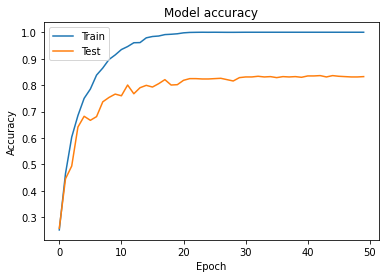

In [ ]:
#https://keras.io/ja/visualization/
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=128)
print(test_acc)

7/7 [==============================] - 0s 34ms/step - loss: 0.8338 - accuracy: 0.8741
0.8741418719291687


## 分割交差検証
AKIRAME! ミ☆

In [ ]:
#fold分割
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv')

def make_validation_data(idx):
  df_fold = df[df['fold'] == idx]
  labels_val = np.array(df_fold['classID'])
  img_path_list_val = df_fold['spectrogram_path']

  spectrogram_data_list_val = []
  img_size = (100,100)

  for img in img_path_list_val:
      temp_img_val = load_img(img,grayscale=False,target_size=(img_size))
      temp_img_array_val = img_to_array(temp_img_val) /255
      spectrogram_data_list_val.append(temp_img_array_val)

  spectrogram_data_list_val = np.array(spectrogram_data_list_val)

  return labels_val, spectrogram_data_list_val

label1, data1 = make_validation_data(1)
label2, data2 = make_validation_data(2)
label3, data3 = make_validation_data(3)
label4, data4 = make_validation_data(4)
label5, data5 = make_validation_data(5)
label6, data6 = make_validation_data(6)
label7, data7 = make_validation_data(7)
label8, data8 = make_validation_data(8)
label9, data9 = make_validation_data(9)
label10, data10 = make_validation_data(10)

#以下論文CNN実装


---


##分類器Softmax関数ver.


---

////////
ここからでも行けるよー
////////

In [ ]:
def load_directries():
  #作業用にスペクトログラムたちをアップロード
  print('loading directries...')

  my_process = run(
    ['mkdir', '/content/spectrogram_resized'], # コマンドはスペース区切りではなく、リストで渡す。
    shell=False,  # Default が False なので省略可能ですが念の為（False の方が安全）。
    stdout=PIPE, stderr=PIPE
  )

  for i in tqdm(range(1,11)):
    i = str(i)
    my_process = run(
      ['cp', '-r', '/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/spectrogram_resized/fold' + i + '/', '/content/spectrogram_resized/'], # コマンドはスペース区切りではなく、リストで渡す。
      shell=False,  # Default が False なので省略可能ですが念の為（False の方が安全）。
      stdout=PIPE, stderr=PIPE
    )

In [ ]:
def load_UrbanSound8K():
  #以下データセット作成
  #まずはCSVからDataFrameを作成して、シャッフル
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv')
  df_shaffle = df.sample(frac=1, ignore_index=True)

  #画像データをndarray化して格納
  #ちょっと時間かかるかも？（20秒くらい）
  print('making spectrogram array...')
  img_path_list = df_shaffle['spectrogram_path']
  spectrogram_data_list = []
  img_size = (100,100)

  for img in tqdm(img_path_list):
      temp_img = load_img(img,grayscale=False,target_size=(img_size))
      temp_img_array = img_to_array(temp_img) /255
      spectrogram_data_list.append(temp_img_array)

  spectrogram_data_list = np.array(spectrogram_data_list)
  print(f'dataset shape: {spectrogram_data_list.shape}')

  #正解ラベル格納
  print('making label array...')
  labels = df_shaffle['classID']
  labels = np.array(labels)

  #訓練データとテストデータに分割
  #divide_idxまでのデータが訓練データ
  divide_idx = int(len(df_shaffle) * 0.9)
  divide_idx

  #分割
  train_images = spectrogram_data_list[:divide_idx, :, :, :]
  train_labels = labels[:divide_idx]
  test_images = spectrogram_data_list[divide_idx:, :, :, :]
  test_labels = labels[divide_idx:]

  print('Succeed!')

  return (train_images, train_labels), (test_images, test_labels)

In [ ]:
def CNN():
  keras.backend.clear_session()

  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), input_shape=(100, 100, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.Flatten())
  model.add(layers.Dense(500))
  model.add(layers.ReLU())
  model.add(layers.Dense(450))
  model.add(layers.ReLU())
  model.add(layers.Dense(10))
  model.add(Activation('softmax'))

  model.summary()

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
load_directries()

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_UrbanSound8K()
train_images = train_images.reshape((-1, 100, 100, 3))
test_images = test_images.reshape((-1, 100, 100, 3))

loading directries...
making spectrogram array...
dataset shape: (8732, 100, 100, 3)
making label array...
Succeed!


In [ ]:
model = CNN()
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=128, epochs=50)

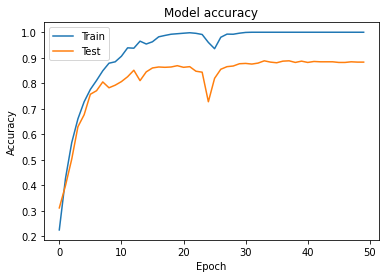

In [ ]:
#https://keras.io/ja/visualization/
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=128)
print(test_acc)

7/7 [==============================] - 0s 16ms/step - loss: 0.9355 - accuracy: 0.8501
0.8501144051551819




---


## 分類器を変更する

---


////////
ここからでも行けるよー
////////

https://qiita.com/cvusk/items/c4b819d10fca1a2d469b

とりあえずデータセット作ったり、システムに使う関数たち（愛しい）

In [ ]:
def load_directories():
  #作業用にスペクトログラムたちをアップロード
  print('loading directories...')

  my_process = run(
    ['mkdir', '/content/spectrogram_resized'], # コマンドはスペース区切りではなく、リストで渡す。
    shell=False,  # Default が False なので省略可能ですが念の為（False の方が安全）。
    stdout=PIPE, stderr=PIPE
  )

  for i in tqdm(range(1,11)):
    i = str(i)
    my_process = run(
      ['cp', '-r', '/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/spectrogram_resized/fold' + i + '/', '/content/spectrogram_resized/'], # コマンドはスペース区切りではなく、リストで渡す。
      shell=False,  # Default が False なので省略可能ですが念の為（False の方が安全）。
      stdout=PIPE, stderr=PIPE
    )

def load_UrbanSound8K(train_size=0.9):
  #以下データセット作成
  #まずはCSVからDataFrameを作成して、シャッフル
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/22-5k_UrbanSound8K/metadata/22-5k_UrbanSound8K.csv')
  df_shaffle = df.sample(frac=1, ignore_index=True)

  #画像データをndarray化して格納
  #ちょっと時間かかるかも？（20秒くらい）
  print('making spectrogram array...')
  img_path_list = df_shaffle['spectrogram_path']
  spectrogram_data_list = []
  img_size = (100,100)

  for img in tqdm(img_path_list):
      temp_img = load_img(img,grayscale=False,target_size=(img_size))
      temp_img_array = img_to_array(temp_img) /255
      spectrogram_data_list.append(temp_img_array)

  spectrogram_data_list = np.array(spectrogram_data_list)
  print(f'dataset shape: {spectrogram_data_list.shape}')

  #正解ラベル格納
  print('making label array...')
  labels = df_shaffle['classID']
  labels = np.array(labels)

  #訓練データとテストデータに分割
  #divide_idxまでのデータが訓練データ
  divide_idx = int(len(df_shaffle) * train_size)
  divide_idx

  #分割
  train_images = spectrogram_data_list[:divide_idx, :, :, :]
  train_labels = labels[:divide_idx]
  test_images = spectrogram_data_list[divide_idx:, :, :, :]
  test_labels = labels[divide_idx:]

  print('Succeed!')

  return (train_images, train_labels), (test_images, test_labels)

def CNN():
  keras.backend.clear_session()

  model = models.Sequential()
  model.add(layers.Conv2D(8, (3, 3), input_shape=(100, 100, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(16, (3, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(32, (3, 3)))
  model.add(layers.BatchNormalization(axis=1))
  model.add(layers.ReLU())
  model.add(layers.Flatten())
  model.add(layers.Dense(500))
  model.add(layers.ReLU())
  model.add(layers.Dense(450))
  model.add(layers.ReLU())
  model.add(layers.Dense(10))
  model.add(Activation('softmax'))

  model.summary()

  return model

def odd_rounding(epoch_num=1):
  num = int((450 / 64 ) * epoch_num)
  if num%2 == 0:
    return num - 1
  else:
    return num

データセット読み込み/CNNインスタンス化

In [ ]:
#作業ディレクトリ作成
load_directories()

loading directories...


100%|██████████| 10/10 [02:01<00:00, 12.13s/it]


In [ ]:
#データセット読み込み
#インスタンス化
(train_images, train_labels), (test_images, test_labels) = load_UrbanSound8K()
train_images = train_images.reshape((-1, 100, 100, 3))
test_images = test_images.reshape((-1, 100, 100, 3))

model = CNN()

making spectrogram array...


100%|██████████| 8732/8732 [00:07<00:00, 1211.68it/s]


dataset shape: (8732, 100, 100, 3)
making label array...
Succeed!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 8)         224       
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 8)        392       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 98, 98, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        1168      
                                                        

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

学習します

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, batch_size=128, epochs=50)

Epoch 1/50
56/56 [==============================] - 14s 37ms/step - loss: 2.5735 - accuracy: 0.2848 - val_loss: 2.2959 - val_accuracy: 0.1514
Epoch 2/50
56/56 [==============================] - 2s 29ms/step - loss: 1.3217 - accuracy: 0.5354 - val_loss: 1.7473 - val_accuracy: 0.4249
Epoch 3/50
56/56 [==============================] - 2s 29ms/step - loss: 1.0980 - accuracy: 0.6257 - val_loss: 1.5663 - val_accuracy: 0.5407
Epoch 4/50
56/56 [==============================] - 2s 29ms/step - loss: 0.8769 - accuracy: 0.7081 - val_loss: 1.2942 - val_accuracy: 0.6667
Epoch 5/50
56/56 [==============================] - 2s 29ms/step - loss: 0.6437 - accuracy: 0.7848 - val_loss: 1.0773 - val_accuracy: 0.6654
Epoch 6/50
56/56 [==============================] - 2s 29ms/step - loss: 0.5184 - accuracy: 0.8225 - val_loss: 0.8468 - val_accuracy: 0.7443
Epoch 7/50
56/56 [==============================] - 2s 29ms/step - loss: 0.3986 - accuracy: 0.8609 - val_loss: 0.7536 - val_accuracy: 0.7366
Epoch 8/50
5

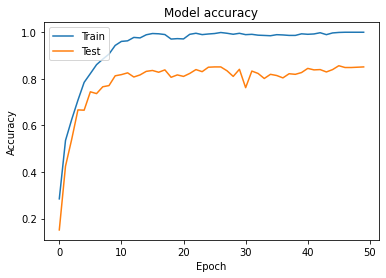

In [ ]:
#https://keras.io/ja/visualization/
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Softmax

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, batch_size=128)
print(test_acc)

7/7 [==============================] - 0s 33ms/step - loss: 0.7825 - accuracy: 0.8604
0.8604118824005127


layer表示

In [ ]:
from keras import backend as K
for l in range(len(model.layers)):
    print(l, model.layers[l])

0 <keras.layers.convolutional.Conv2D object at 0x7f8f1a2232d0>
1 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8f11f59f90>
2 <keras.layers.advanced_activations.ReLU object at 0x7f8f11efc2d0>
3 <keras.layers.pooling.MaxPooling2D object at 0x7f8f11efc1d0>
4 <keras.layers.convolutional.Conv2D object at 0x7f8f11f41e90>
5 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8f11ea8390>
6 <keras.layers.advanced_activations.ReLU object at 0x7f8f11eb4790>
7 <keras.layers.pooling.MaxPooling2D object at 0x7f8f11ea8d90>
8 <keras.layers.convolutional.Conv2D object at 0x7f8f11eb0710>
9 <keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8f11e8fb90>
10 <keras.layers.advanced_activations.ReLU object at 0x7f8f11ea8490>
11 <keras.layers.core.flatten.Flatten object at 0x7f8f11e222d0>
12 <keras.layers.core.dense.Dense object at 0x7f8f11e8fc90>
13 <keras.layers.advanced_activations.ReLU object at 0x7f8f11e8cd50>
14

###ソフトマックス関数だけバツっと切って新しい関数にします

In [ ]:
getFeature = K.function([model.layers[0].input],[model.layers[16].output])

CNNで学習したデータを格納します

In [ ]:
exTrain = getFeature(train_images)[0]
exTest = getFeature(test_images)[0]

sklearnに対応するよう形を変えます

In [ ]:
y_train = train_labels.reshape(train_labels.shape[0],)
y_test = test_labels
print(exTrain.shape, exTest.shape, y_train.shape, y_test.shape)

(7858, 10) (874, 10) (7858,) (874,)


In [ ]:
watch = pd.DataFrame(exTrain)
watch

,0,1,2,3,4,5,6,7,8,9
0,-5.340033,-0.225683,-4.733506,0.675331,-7.210188,-5.136466,3.342054,3.135652,-3.060477,16.685158
1,-1.425707,-9.515041,-0.491808,-7.660938,-4.408597,-2.101576,-13.512258,-8.740072,4.876273,20.508627
2,-5.162477,0.093932,1.230278,19.464672,3.769762,-3.468834,2.710215,-6.124370,-4.496463,-9.108043
3,-0.862351,-0.059057,2.509856,5.675749,-5.123672,-5.596864,-11.060357,-9.613229,2.409008,14.454963
4,2.622404,0.141635,-1.098849,-1.181118,-0.658943,0.239681,11.540917,-3.208775,-10.028427,-3.958490
...,...,...,...,...,...,...,...,...,...,...
7853,-0.475333,-2.696612,12.303860,4.268476,-6.169731,-2.175844,-7.241591,-3.717019,-0.124805,8.859193
7854,4.246568,-7.526361,-1.459183,4.382017,2.633555,19.028614,-6.438814,0.332421,-9.556043,-5.106133
7855,-0.432778,-2.449431,1.570576,-6.039834,3.986494,-3.046299,-7.056891,12.531057,-5.322188,1.091670
7856,-11.238596,-6.804419,4.548141,-6.966983,8.105234,-2.154650,-3.267669,24.395855,-14.049948,3.446018


In [ ]:
y_train

array([9, 9, 3, ..., 7, 7, 9])

###SVM

最適ハイパーパラメータ探索
GridSearchCV

In [ ]:
# import SVC and GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# parameters for GridSearchCV
parameters = {'kernel':['rbf'],
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
# GridSearchCV
clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain, y_train)
print('clf.best_params_', clf.best_params_)
print('clf.best_score_', clf.best_score_)


clf.best_params_ {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
clf.best_score_ 0.982050702701477


In [ ]:
# import SVC and GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'],
              'C':[16, 18, 20, 22, 24],
              'gamma':[1e-3, 1e-4]}

clf = GridSearchCV(SVC(), parameters)
clf.fit(exTrain, y_train)
print('clf.best_params_', clf.best_params_)
print('clf.best_score_', clf.best_score_)

clf.best_params_ {'C': 24, 'gamma': 0.0001, 'kernel': 'rbf'}
clf.best_score_ 0.9856142584341183


祝・最適パラメータゲット→実装

In [ ]:
# train SVC with searched paramters
svmclf = clf.best_estimator_
svmclf.fit(exTrain, y_train)

# predict test data
y_testSVM = svmclf.predict(exTest)

# get metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(y_test, y_testSVM)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        93
           1       0.84      0.78      0.81        41
           2       0.66      0.73      0.69        82
           3       0.92      0.79      0.85        97
           4       0.93      0.88      0.90       107
           5       0.85      0.93      0.89       110
           6       0.86      0.97      0.91        33
           7       0.94      0.92      0.93       106
           8       0.91      0.92      0.91       106
           9       0.72      0.72      0.72        99

    accuracy                           0.86       874
   macro avg       0.86      0.86      0.85       874
weighted avg       0.86      0.86      0.86       874

Accuracy: 0.8569794050343249


###RandomForest

In [ ]:
# import RandomForestClassifier and GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# parameters for GridSearchCV
parameters = {"max_depth": [None],
              "max_features": [1],
              "min_samples_split": [1.0, 3, 10],
              "min_samples_leaf": [1],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"],
              "n_estimators": [10, 20, 50]}
# GridSearchCV
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(exTrain, y_train)

print('rgclf.best_params_', rgclf.best_params_)
print('rgclf.best_score_', rgclf.best_score_)


rgclf.best_params_ {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
rgclf.best_score_ 0.980904935674106


In [ ]:
# parameters for GridSearchCV
parameters = {"max_depth": [None],
              "max_features": [1],
              "min_samples_split": [10],
              "min_samples_leaf": [1],
              "bootstrap": [True],
              "criterion": ["gini"],
              "n_estimators": [60, 70, 100]}
# GridSearchCV
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(exTrain, y_train)

print('rgclf.best_params_', rgclf.best_params_)
print('rgclf.best_score_', rgclf.best_score_)


rgclf.best_params_ {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
rgclf.best_score_ 0.9801412529579544


In [ ]:
# train RandomForestClassifier with the searched parameter
rclf = rgclf.best_estimator_
rclf.fit(exTrain, y_train)

# predict test data
y_testRF = rclf.predict(exTest)

# get metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


print(classification_report(y_test, y_testRF))
print("Accuracy: {0}".format(accuracy_score(y_test, y_testRF)))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        94
           1       0.84      0.79      0.82        34
           2       0.70      0.68      0.69       105
           3       0.78      0.69      0.73       100
           4       0.93      0.88      0.90       112
           5       0.86      0.90      0.88        97
           6       0.90      0.92      0.91        39
           7       0.92      0.91      0.91        97
           8       0.81      0.87      0.84       105
           9       0.66      0.71      0.68        91

    accuracy                           0.82       874
   macro avg       0.83      0.83      0.83       874
weighted avg       0.82      0.82      0.82       874

Accuracy: 0.8215102974828375


###KNN

In [ ]:
# import KNeighborsClassifier and GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# parameters for GridSearchCV
parameters = {"n_neighbors": [1, 5, 10, 30],
              "weights": ['uniform'],
              "metric": ['euclidean'],
              "algorithm": ['auto']}
# GridSearchCV
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(exTrain, y_train)

print('kgclf.best_params_', kgclf.best_params_)
print('kgclf.best_score_', kgclf.best_score_)


kgclf.best_params_ {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'uniform'}
kgclf.best_score_ 0.9849779641498341


In [ ]:
# parameters for GridSearchCV
parameters = {"n_neighbors": [2, 3, 4, 5, 6],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski'],
              "algorithm": ['auto']}
# GridSearchCV
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(exTrain, y_train)

print('kgclf.best_params_', kgclf.best_params_)
print('kgclf.best_score_', kgclf.best_score_)

kgclf.best_params_ {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 4, 'weights': 'distance'}
kgclf.best_score_ 0.985614420402881


In [ ]:
# train KNeighborsClassifier with the searched parameter
kclf = kgclf.best_estimator_
kclf.fit(exTrain, y_train)

# predict test data
y_testKNN = kclf.predict(exTest)

# get metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(y_test, y_testKNN))
print("Accuracy: {0}".format(accuracy_score(y_test, y_testKNN)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        93
           1       0.87      0.80      0.84        41
           2       0.67      0.80      0.73        82
           3       0.94      0.79      0.86        97
           4       0.94      0.91      0.92       107
           5       0.89      0.93      0.91       110
           6       0.86      0.97      0.91        33
           7       0.93      0.94      0.94       106
           8       0.93      0.92      0.93       106
           9       0.75      0.74      0.74        99

    accuracy                           0.87       874
   macro avg       0.87      0.87      0.87       874
weighted avg       0.88      0.87      0.88       874

Accuracy: 0.8741418764302059


###アンサンブルknn
バツっと切るところから

In [ ]:
# import KNeighborsClassifier and GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
getFeature = K.function([model.layers[0].input],[model.layers[14].output])

In [ ]:
exTrain = getFeature(train_images)[0]
exTest = getFeature(test_images)[0]

In [ ]:
y_train = train_labels.reshape(train_labels.shape[0],)
y_test = test_labels
print(exTrain.shape, exTest.shape, y_train.shape, y_test.shape)

(7858, 450) (874, 450) (7858,) (874,)


In [ ]:
#訓練データ
watch = pd.DataFrame(exTrain)
watch

In [ ]:
#テストデータ
watch_test = pd.DataFrame(exTest)
watch_test

In [ ]:
#KNN読み込み
parameters = {"n_neighbors": [1],
              "weights": ['uniform'],
              "metric": ['euclidean'],
              "algorithm": ['auto']}

kclf = KNeighborsClassifier()

弱KNN学習

ループ処理でまとめてみました

In [ ]:
#空の投票器作成(初期化)
ensamble = pd.DataFrame()
ensamble

for i in tqdm(range(odd_rounding(epoch_num=1))):
  ##部分空間抽出
  ##train data
  get_random = watch.sample(axis=1, n=64, random_state=i)
  sample_train = get_random.to_numpy()
  #print(f'sample_train.shape {sample_train.shape}')

  ##test data
  get_random_test = watch_test.sample(axis=1, n=64, random_state=i)
  sample_test = get_random_test.to_numpy()
  #print(f'sample_test.shape {sample_test.shape}')

  ##弱KNN　学習
  kclf.fit(sample_train, y_train)
  ## 稼働
  y_testKNN = kclf.predict(sample_test)

  ##投票器に追加
  ensamble[i] = y_testKNN

ensamble

100%|██████████| 7/7 [00:01<00:00,  5.29it/s]


,0,1,2,3,4,5,6
0,1,1,1,1,1,1,1
1,7,7,7,7,7,7,7
2,4,4,4,4,4,4,4
3,3,3,3,3,3,3,3
4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
869,5,5,5,5,5,5,5
870,8,8,8,8,8,8,8
871,6,6,6,6,6,6,6
872,0,0,0,0,0,0,0


投票

In [ ]:
vote_value = ensamble.mode(axis=1)[0].astype(int).to_numpy()

判定(accuracy)

In [ ]:
acc_check = y_test - vote_value
KNN_ensamble_accuracy = (len(acc_check) - np.count_nonzero(acc_check)) / len(acc_check)
print(f'Random Subspace KNN ensamble Classifier\nAccuracy: {KNN_ensamble_accuracy}')

Random Subspace KNN ensamble Classifier
Accuracy: 0.8558352402745996


###EPOCH数増やしてみる

In [ ]:
# import KNeighborsClassifier and GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

getFeature = K.function([model.layers[0].input],[model.layers[14].output])

exTrain = getFeature(train_images)[0]
exTest = getFeature(test_images)[0]

y_train = train_labels.reshape(train_labels.shape[0],)
y_test = test_labels
print(exTrain.shape, exTest.shape, y_train.shape, y_test.shape)

#訓練データ
watch = pd.DataFrame(exTrain)

#テストデータ
watch_test = pd.DataFrame(exTest)

#KNN読み込み
parameters = {"n_neighbors": [1],
              "weights": ['uniform'],
              "metric": ['euclidean'],
              "algorithm": ['auto']}

kclf = KNeighborsClassifier()

#空の投票器作成(初期化)
ensamble = pd.DataFrame()

#グラフ用のAccuracy list
accuracy_list = []

for j in range(1,21):
  print(f'Epoch{j}')
  for i in tqdm(range(odd_rounding(epoch_num=j))):
    ##部分空間抽出
    ##train data
    get_random = watch.sample(axis=1, n=64, random_state=i)
    sample_train = get_random.to_numpy()
    #print(f'sample_train.shape {sample_train.shape}')

    ##test data
    get_random_test = watch_test.sample(axis=1, n=64, random_state=i)
    sample_test = get_random_test.to_numpy()
    #print(f'sample_test.shape {sample_test.shape}')

    ##弱KNN　学習
    kclf.fit(sample_train, y_train)
    ## 稼働
    y_testKNN = kclf.predict(sample_test)

    ##投票器に追加
    ensamble[i] = y_testKNN


  vote_value = ensamble.mode(axis=1)[0].astype(int).to_numpy()

  acc_check = y_test - vote_value
  KNN_ensamble_accuracy = (len(acc_check) - np.count_nonzero(acc_check)) / len(acc_check)
  print(f'Random Subspace KNN ensamble Classifier\nAccuracy: {KNN_ensamble_accuracy}\n')
  accuracy_list.append(KNN_ensamble_accuracy)


(7858, 450) (874, 450) (7858,) (874,)
Epoch1


100%|██████████| 7/7 [00:01<00:00,  4.80it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8787185354691075

Epoch2


100%|██████████| 13/13 [00:02<00:00,  4.94it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8764302059496567

Epoch3


100%|██████████| 21/21 [00:04<00:00,  4.99it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8787185354691075

Epoch4


100%|██████████| 27/27 [00:05<00:00,  5.01it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.879862700228833

Epoch5


100%|██████████| 35/35 [00:07<00:00,  4.96it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8844393592677345

Epoch6


100%|██████████| 41/41 [00:08<00:00,  4.96it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8844393592677345

Epoch7


100%|██████████| 49/49 [00:09<00:00,  5.00it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8821510297482837

Epoch8


100%|██████████| 55/55 [00:11<00:00,  5.00it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch9


100%|██████████| 63/63 [00:12<00:00,  4.95it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.879862700228833

Epoch10


100%|██████████| 69/69 [00:13<00:00,  4.94it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8832951945080092

Epoch11


100%|██████████| 77/77 [00:15<00:00,  5.02it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8832951945080092

Epoch12


100%|██████████| 83/83 [00:16<00:00,  5.04it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8832951945080092

Epoch13


100%|██████████| 91/91 [00:18<00:00,  5.05it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch14


100%|██████████| 97/97 [00:19<00:00,  5.04it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch15


100%|██████████| 105/105 [00:20<00:00,  5.05it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch16


100%|██████████| 111/111 [00:21<00:00,  5.10it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch17


100%|██████████| 119/119 [00:23<00:00,  5.09it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.879862700228833

Epoch18


100%|██████████| 125/125 [00:24<00:00,  5.06it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch19


100%|██████████| 133/133 [00:26<00:00,  5.07it/s]


Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584

Epoch20


100%|██████████| 139/139 [00:27<00:00,  5.09it/s]

Random Subspace KNN ensamble Classifier
Accuracy: 0.8810068649885584



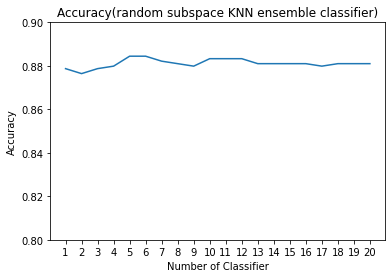


Accuracy(Average): 0.8811212814645308


In [ ]:
x_axis = range(1, 20+1)
plt.plot(x_axis, accuracy_list)
plt.title("Accuracy(random subspace KNN ensemble classifier)")
plt.xlabel("Number of Classifier")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.xticks(x_axis)
plt.show()
print(f'\nAccuracy(Average): {sum(accuracy_list) / len(accuracy_list)}')